Progressive

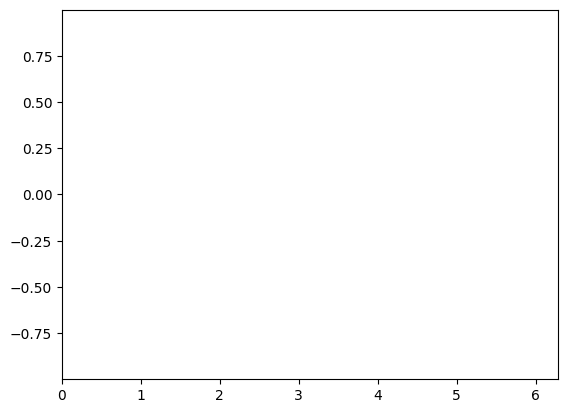

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

fig,ax = plt.subplots()
animated_plot, = plt.plot([],[])
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

def animate(i):
  animated_plot.set_data(x[:i],y[:i])
  return animated_plot

anim = animation.FuncAnimation(fig, animate, frames = 100, blit=False,
                               interval=100)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np

t = np.linspace(0,2*np.pi,100)
x = np.cos(t)
y = np.sin(t)

fig,ax = plt.subplots()
animated_plot, = plt.plot([],[])
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

def animate(i):
  animated_plot.set_data(x[:i],y[:i])
  return animated_plot

anim = animation.FuncAnimation(fig, animate, frames = 101, blit=False,
                               interval=50)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

Random Walk

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np

n = 50
x = np.array([[np.random.rand()*0 for j in range(n)]])
y = np.array([[np.random.rand()*0 for j in range(n)]])


vx = np.array([0 for j in range(n)])
vy = np.array([0 for j in range(n)])

frame = 300
for i in range(frame):
  ax = np.array([2*np.random.rand()-1 for j in range(n)])
  ay = np.array([2*np.random.rand()-1 for j in range(n)])
  vx = vx+ax
  vy = vy+ay
  x = np.concat((x,[x[i-1]+vx]))
  y = np.concat((y,[y[i-1]+vy]))

fig,ax = plt.subplots()
animated_plot, = plt.plot(x[0],y[0],"ro")
xmax = max([max(x[i]) for i in range(len(x))])
xmin = min([min(x[i]) for i in range(len(x))])
ymax = max([max(y[i]) for i in range(len(y))])
ymin = min([min(y[i]) for i in range(len(y))])
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

def animate(i):
  animated_plot.set_data(x[i],y[i])
  return animated_plot

anim = animation.FuncAnimation(fig, animate, frames = frame, blit=False,
                               interval=30)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

1D Particle Swarm Optimation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *

x = symbols("x")

n = 10
phi1 = .5
phi2 = .2
phi3 = .3
f = x**2/2 - sin(x)
xid = [random.random() for i in range(n)]
pid = xid.copy()
vid = [(2*random.random()-1)*.1 for i in range(n)]

pgd = 0
for i in range(n):
  if f.subs(x,xid[i]) < f.subs(x,pgd):
    pgd = xid[i]

print("xid =",xid)
print("pgd =",pgd)
print()
for i in range(100):
  for j in range(n):
    r = random.random()
    vid[j] = phi1*vid[j] + r*(phi2*(pid[j] - xid[j]) + phi3*(pgd - xid[j]))
    new_pos = xid[j] + vid[j]
    if f.subs(x,new_pos) < f.subs(x,pid[j]):
      pid[j] = new_pos
    if f.subs(x,new_pos) < f.subs(x,pgd):
      pgd = new_pos
    xid[j] = new_pos
  print()
  print(i)
  print("vid =",vid)
  print("xid =",xid)
  print("pid =",pid)
  print("pgd =",pgd)
  print()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np
import random

fig,ax = plt.subplots()

def f(x):
  return x**2/2 - np.sin(x)

x = np.linspace(0,1,100)
y = f(x)
init_plot = plt.plot(x,y)

n = 30
phi1 = .5
phi2 = .2
phi3 = .3

xid = np.array([[random.random() for i in range(n)]])
yid = f(xid)
pid = xid.copy()[0]
vid = np.array([(2*random.random()-1)*.1 for i in range(n)])
partikel, = plt.plot(xid[0],yid[0],"ro")

pgd = 0
for i in range(n):
  if f(xid[0][i]) < f(pgd):
    pgd = xid[0][i]

frame = 100
for i in range(frame):
  new_pos = np.array([float(0) for i in range(n)])
  for j in range(n):
    r = np.random.rand()
    vid[j] = phi1*vid[j] + r*(phi2*(pid[j] - xid[i-1][j]) + phi3*(pgd - xid[i-1][j]))
    new_pos[j] = xid[i-1][j] + vid[j]
    if f(new_pos[j]) < f(pid[j]):
      pid[j] = new_pos[j]
    if f(new_pos[j]) < f(pgd):
      pgd = new_pos[j]
  xid = np.concat((xid,[new_pos]))
  yid = np.concat((yid,[f(new_pos)]))

def animate(i):
  partikel.set_data([xid[i]],[yid[i]])
  return partikel

anim = animation.FuncAnimation(fig, animate, frames = range(0,frame), blit=False,
                               interval=300)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import numpy as np

fig,ax = plt.subplots()

def f(x):
  return -(1 + np.cos(12*x))/(x**2/2 + 2)

x = np.linspace(-1*np.pi,1*np.pi,500)
y = f(x)
init_plot = plt.plot(x,y)

n = 100
phi1 = .5
phi2 = .2
phi3 = .8

xid = np.array([[2*random.random()*np.pi-np.pi for i in range(n)]])
yid = f(xid)
pid = xid.copy()[0]
vid = np.array([(2*random.random()-1)*.1 for i in range(n)])
partikel, = plt.plot(xid[0],yid[0],"go")

pgd = 0
for i in range(n):
  if f(xid[0][i]) < f(pgd):
    pgd = xid[0][i]

frame = 100
for i in range(frame):
  new_pos = np.array([float(0) for i in range(n)])
  for j in range(n):
    r = np.random.rand()
    vid[j] = phi1*vid[j] + r*(phi2*(pid[j] - xid[i-1][j]) + phi3*(pgd - xid[i-1][j]))
    new_pos[j] = xid[i-1][j] + vid[j]
    if f(new_pos[j]) < f(pid[j]):
      pid[j] = new_pos[j]
    if f(new_pos[j]) < f(pgd):
      pgd = new_pos[j]
  xid = np.concat((xid,[new_pos]))
  yid = np.concat((yid,[f(new_pos)]))

def animate(i):
  partikel.set_data([xid[i]],[yid[i]])
  return partikel

anim = animation.FuncAnimation(fig, animate, frames = range(0,frame), blit=False,
                               interval=100)

# Kode tambahan jika dijalankan di colab/jupyter
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='jshtml')
anim

# Live Coding DS-04-02 Selasa, 28 Oktober 12.00

In [ ]:
from random import random # membangkitkan bil. acak

for i in range(10):
  print(random()) # mengacak [0,1]

0.2959426340377873
0.8879234091695324
0.07979523967181035
0.47165042108819366
0.3584904629680652
0.5332592419367833
0.06262164838208484
0.7518062730957468
0.8209649714580216
0.26528416659543386


In [ ]:
for i in range(10):
  print(5*random()) # mengacak [0,5]

2.8736969437138344
2.4829985919550275
2.1199385726894477
3.9566855790259647
2.5890929109711958
0.5989071550714453
3.945666955447107
1.0207670228618433
0.018255882907394216
4.265448380878492


In [ ]:
for i in range(10):
  print(-5+10*random()) # mengacak [-5,5]

2.7229184464021907
1.1962055332008763
-2.7571563627925
2.653316099125674
1.1613195438838861
1.3901876248132883
-2.7823287215078873
-1.9526676602871595
4.278861455152596
1.1957913254911432


In [ ]:
for i in range(10):
  print(2+6*random()) # mengacak [2,8]

3.874119759829781
2.6613922662543565
2.0804238666492214
3.86240310695511
2.5265247636955515
4.190881220021597
7.200622735518465
5.938472794293288
3.0645548700671252
4.649572073362559


In [ ]:
# mengacak [a,b]: print(a+(b-a)*random())

1D Particle Swarm Optimization

In [ ]:
# min f(x) = x**2/2 - sin x, 0 <= x <= 1
from math import sin      # pakai fungsi sin
from random import random # membangkitkan bil. acak

# buat fungsi
def f(x):
  return (x-.3)**2

# inisiasi parameter
n = 10 # byk partikel
phi0 = .5
phi1 = .2
phi2 = .3

# inisiasi partikel
x = [random() for i in range(n)] # posisi awal
y = [f(x[i]) for i in range(n)]  # fitness awal
v = [random()-.5 for i in range(n)] # kecepatan awal [-0.5,0.5]
p = x                            # personal best
print(0,x)

# Mencari global best
g = p[0]
for i in range(n):
  if f(p[i]) < f(g):
    g = p[i]

# PSO: proses setelah melangkah
for j in range(20):
  for i in range(n):
    r = random()
    v[i] = phi0*v[i] + phi1*r*(p[i] - x[i]) + phi2*r*(g - x[i])
    x[i] = x[i] + v[i]
    if f(x[i]) < f(p[i]): # update personal best
      p[i] = x[i]
    if f(p[i]) < f(g): # update personal best
      g = p[i]
  print(j+1,x)

0 [0.04655336805787735, 0.5121520228472657, 0.816485352443887, 0.24672517024888463, 0.8211675633435486, 0.9216657831105232, 0.3270173767387916, 0.9273394100297021, 0.008141438384850042, 0.784504943205275]
1 [0.21430092881743248, 0.5426089287474091, 0.7438724468912886, 0.2679662566306957, 0.7160937130080466, 0.8861660926699071, 0.3986164407948445, 0.5930199644082981, 0.2221009714626182, 0.7143920040687259]
2 [0.29866364284890157, 0.5163214818650056, 0.6549354615822938, 0.28746103591568495, 0.6621119821002461, 0.8013438808567718, 0.4078958926366813, 0.36806682389408096, 0.3317533329441327, 0.651911379450551]
3 [0.3408449998646361, 0.4549538040825816, 0.5440884781707559, 0.29795994101434586, 0.6306535951054237, 0.719156970909968, 0.3814113956209043, 0.25409218595123595, 0.3857786482844419, 0.5856187071145896]
4 [0.36172519210680726, 0.4240369875917067, 0.4426348827772489, 0.30322447551930426, 0.541065116448618, 0.6550657274562016, 0.3463915568273736, 0.20324825716110684, 0.397411439526169